In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import data_analysis_tools as tools
import re
import random

## BASELINE

In [2]:
OVERRIDE_OLD_FIXED = False
TEST = False

In [3]:
base_path = "C:/extincao-qpd/logs_good/"
baseline_paths = [
	f"{base_path}tests/",
	# f"{base_path}baseline/4_ghosts_4_target_spread/",
	# f"{base_path}baseline/2_ghosts_0_target_spread/",
	# f"{base_path}baseline/2_ghosts_fixed_target_2_-5/",
	# f"{base_path}baseline/2_ghosts_fixed_target_4_-5/",
]

neuroevolution_paths = [
	# f"{base_path}neuroevolution/battery_3_0/",
	
	# f"{base_path}neuroevolution/B1/",
	# f"{base_path}neuroevolution/B1-path-grading-hack/",
	# f"{base_path}neuroevolution/B1-path-grading-simple/",
	# f"{base_path}neuroevolution/B2/",
	# f"{base_path}neuroevolution/B3/",
	# f"{base_path}neuroevolution/NB4/",
	# f"{base_path}neuroevolution/NB4-path-grading/",
]

neat_paths = [
	# f"{base_path}NEAT/battery_3_0/",
	# f"{base_path}NEAT/saved_logs/no_speciation/",

	# f"{base_path}NEAT/history_size_100/B1/",
	# f"{base_path}NEAT/history_size_100/B1-path-grading-hack/",
	# f"{base_path}NEAT/history_size_100/B1-path-grading-simple/",
	# f"{base_path}NEAT/history_size_100/B2/",
	# f"{base_path}NEAT/history_size_100/B3/",
	# f"{base_path}NEAT/history_size_100/NB4/",
	# f"{base_path}NEAT/history_size_100/NB4-path-grading/",

	# f"{base_path}NEAT/saved_logs/speciated/B1/",
	# f"{base_path}NEAT/saved_logs/speciated/B1-path-grading-hack/",
	# f"{base_path}NEAT/saved_logs/speciated/B1-path-grading-simple/",
	# f"{base_path}NEAT/saved_logs/speciated/B2/",
	# f"{base_path}NEAT/saved_logs/speciated/B3/",
	# f"{base_path}NEAT/saved_logs/speciated/NB4/",
	# f"{base_path}NEAT/saved_logs/speciated/NB4-path-grading/",
]
selected_paths = baseline_paths + neuroevolution_paths + neat_paths

In [4]:
def prepare_data_fixed(path, selected_runs):
	for selected_run in selected_runs:
		this_path = f"{path}{selected_run}.data"
		if not os.path.exists(this_path + "_fixed") or OVERRIDE_OLD_FIXED:
			if not os.path.exists(this_path) or OVERRIDE_OLD_FIXED:
				#join data if necessary
				tools.join_data(this_path)
			tools.quote_gene(this_path)

def get_availiable_runs(filenames_list):
	selected_runs_set = set()
	for filename in filenames_list:
		found = re.findall("[0-9]+", filename)
		if len(found) > 0:
			selected_runs_set.add(found[0])
	return list(selected_runs_set)

def analyse_all_in_path(path):
	in_path_df_dict = dict()
	selected_runs = get_availiable_runs(os.listdir(path))
	prepare_data_fixed(path, selected_runs)
	errors = list()

	for run in selected_runs:
		this_baseline_mode = None
		this_ann_layers = None
		print(path, run)
		run_dict = dict()
		run_dict["run_id"] = run
		run_dict["path"] = path
		with open(f"{path}{run}.conf", 'r') as f:
			for line in f.readlines():
				if tools.ANN_MODE_STRING in line:
					this_mode = line.replace(tools.ANN_MODE_STRING, "")
					run_dict["mode"] = this_mode
				elif tools.ANN_LAYERS_STRING in line:
					this_layers = line.replace(tools.ANN_LAYERS_STRING, "")
					run_dict["layers"] = this_layers

		run_dict["df"], load_errors = tools.load_dataframe(path, run)
		in_path_df_dict[run] = run_dict
		errors.extend(load_errors)
		if TEST == True:
			return in_path_df_dict, errors

	return in_path_df_dict, errors


## Do it

C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110905
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675110905.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110970
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675110970.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110923
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675110923.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110942
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675110942.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110985
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675110985.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675111017
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

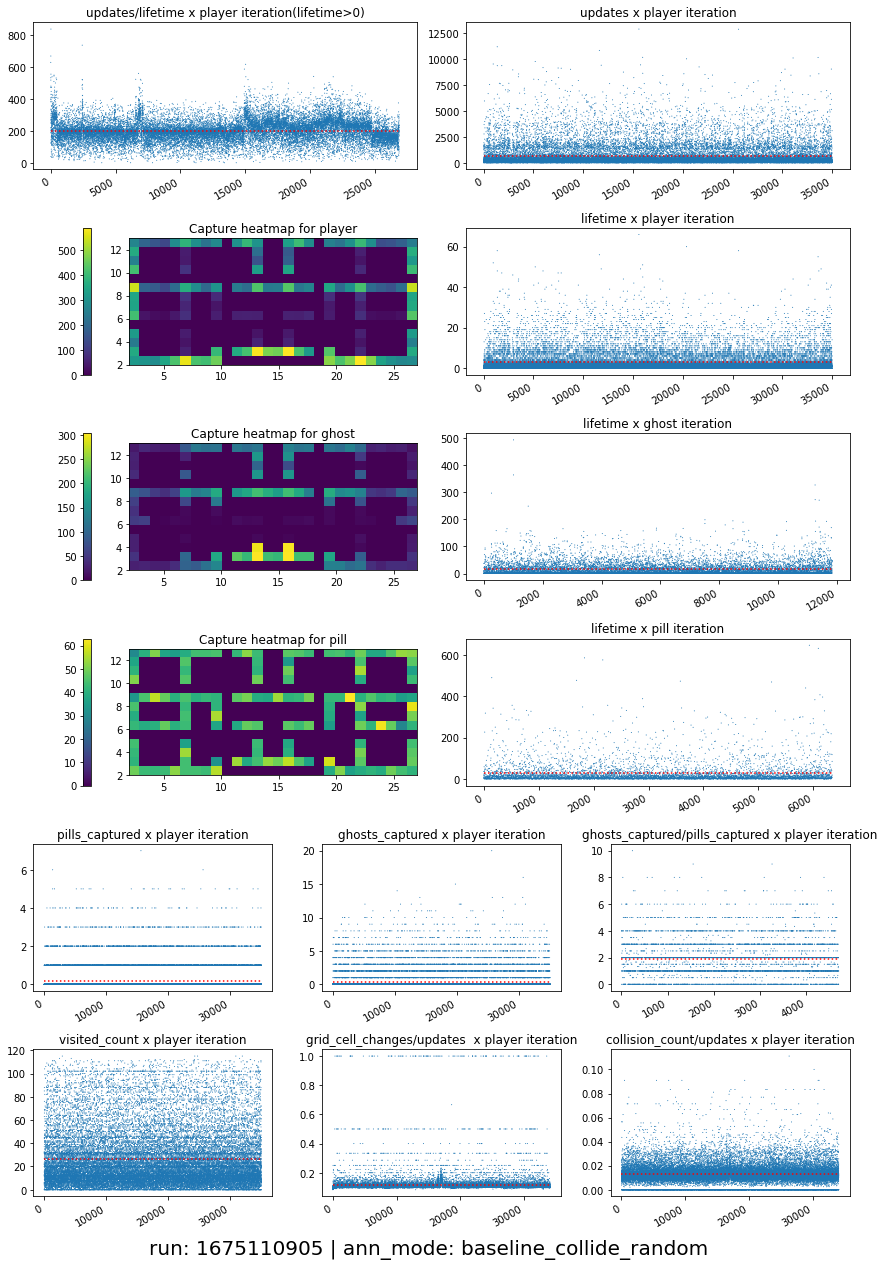

A taxa de atualizacao e as outras metricas
updates/lifetime lifetime r: 0.053970611125609476 rs: 0.10544569193623475 T: 0.08454355350851375
updates/lifetime updates r: 0.16835410039373552 rs: 0.46480596427389187 T: 0.3686675617148721
updates/lifetime visited_count r: 0.26521376822240905 rs: 0.4147653653245643 T: 0.2889278938820865
updates/lifetime grid_cell_changes r: 0.16369237144611418 rs: 0.45876454590514015 T: 0.3508778622114362
updates/lifetime collision_count r: 0.1611672370329727 rs: 0.39156802224013765 T: 0.27351223709961453
updates/lifetime ghosts_captured r: 0.08079727845430419 rs: 0.1298837819935428 T: 0.1032713066231666
updates/lifetime pills_captured r: 0.0910346440760744 rs: 0.14219177997780688 T: 0.11433830416431125
updates e as outras metricas
updates lifetime r: 0.9811179377823231 rs: 0.926977529404165 T: 0.8274752453024488
updates visited_count r: 0.8428967345500732 rs: 0.9467339265693686 T: 0.8174464636118453
updates grid_cell_changes r: 0.9988471030247073 rs: 0.9988

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

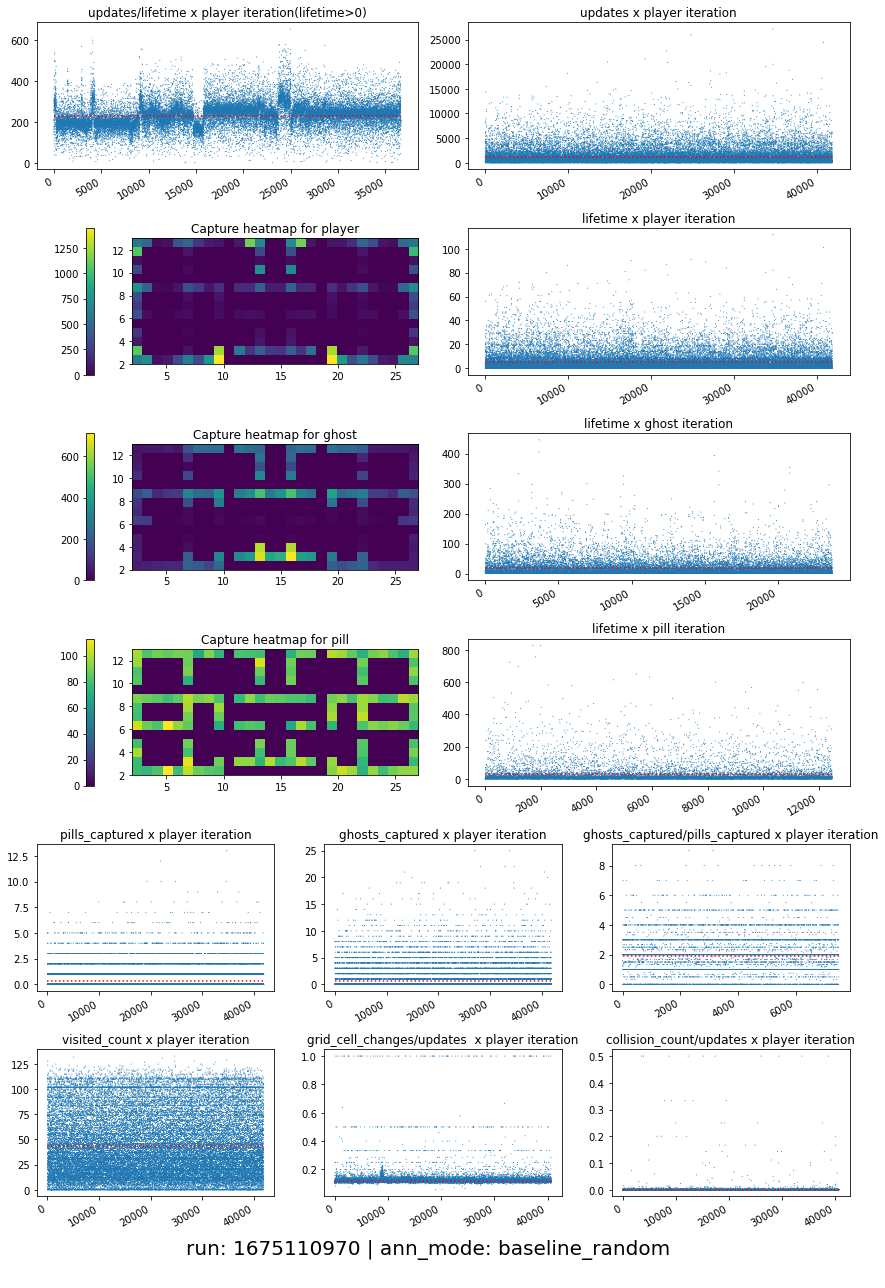

A taxa de atualizacao e as outras metricas
updates/lifetime lifetime r: -0.013199208773725631 rs: 0.024213386065655863 T: 0.020557856056656994
updates/lifetime updates r: 0.08342609161900752 rs: 0.25120806234689336 T: 0.1922005038248445
updates/lifetime visited_count r: 0.16521709420353548 rs: 0.23253215757667778 T: 0.1572347123209769
updates/lifetime grid_cell_changes r: 0.07901178120982669 rs: 0.2432417880253096 T: 0.1741268144663472
updates/lifetime collision_count r: 0.019480421947994615 rs: 0.038560074978976795 T: 0.03105394168189342
updates/lifetime ghosts_captured r: 0.029942986097584626 rs: 0.07033731251300566 T: 0.05534767724355595
updates/lifetime pills_captured r: 0.03641935011131996 rs: 0.07541407649032271 T: 0.06005651929484438
updates e as outras metricas
updates lifetime r: 0.9813791661323674 rs: 0.9737330963809913 T: 0.8945121148928687
updates visited_count r: 0.7609153068638908 rs: 0.9380522879445791 T: 0.7929217742302371
updates grid_cell_changes r: 0.999325010099917 

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

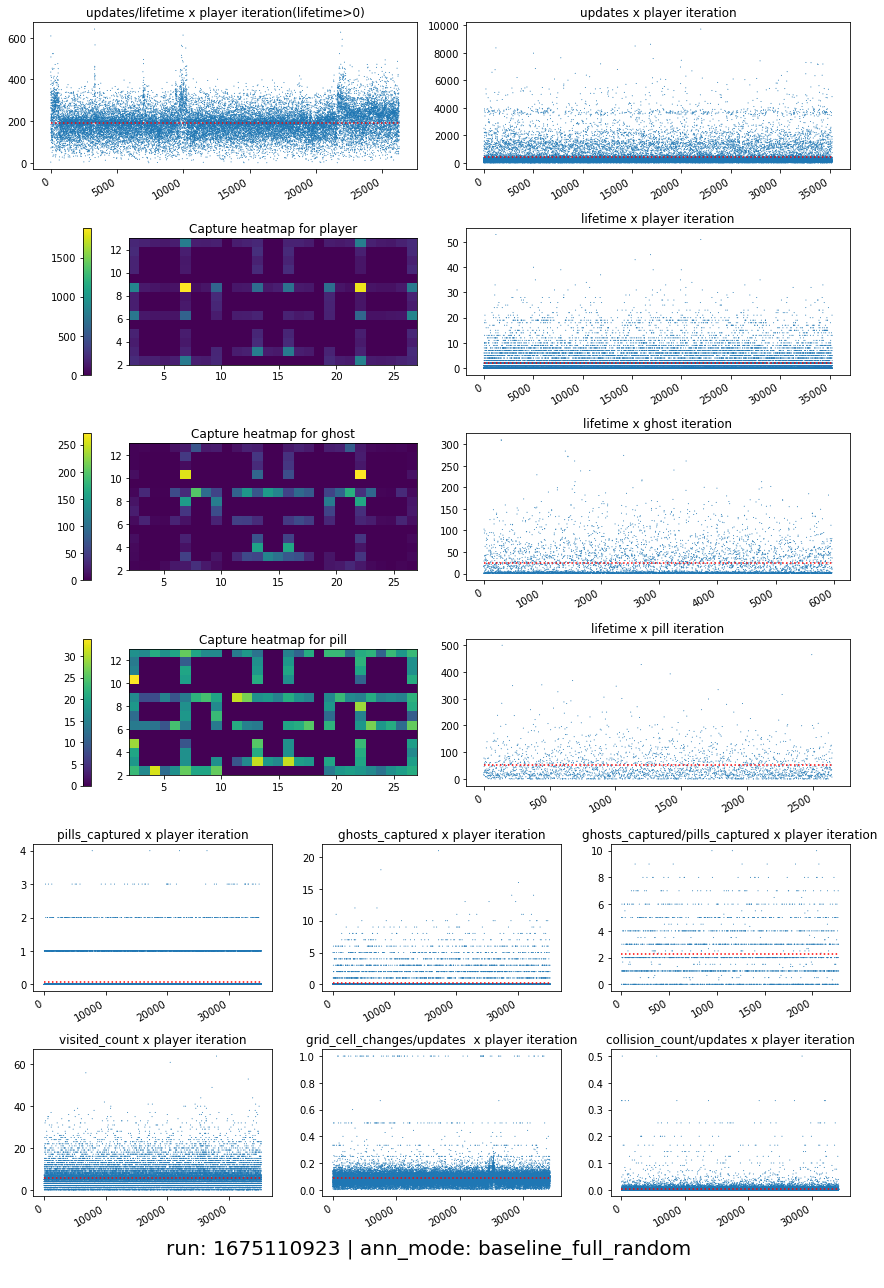

A taxa de atualizacao e as outras metricas
updates/lifetime lifetime r: 0.07340994301932817 rs: 0.07707568169548283 T: 0.06832931743225233
updates/lifetime updates r: 0.1969035036477067 rs: 0.5682367498090364 T: 0.47519443885983453
updates/lifetime visited_count r: 0.22786119013028275 rs: 0.3808144901688824 T: 0.2700206341523283
updates/lifetime grid_cell_changes r: 0.18584659907474788 rs: 0.4318042251164507 T: 0.2977325881113521
updates/lifetime collision_count r: 0.07535430344868768 rs: 0.07521690022735748 T: 0.05951723262493045
updates/lifetime ghosts_captured r: 0.06866879200094579 rs: 0.11055818400558406 T: 0.0891123091762446
updates/lifetime pills_captured r: 0.08780078982210074 rs: 0.1260701336259728 T: 0.10252085102784615
updates e as outras metricas
updates lifetime r: 0.9803604812114505 rs: 0.8737329084047584 T: 0.7648154907850166
updates visited_count r: 0.8397271728880055 rs: 0.8221839191592639 T: 0.6763353248594873
updates grid_cell_changes r: 0.9292204453746243 rs: 0.8704

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

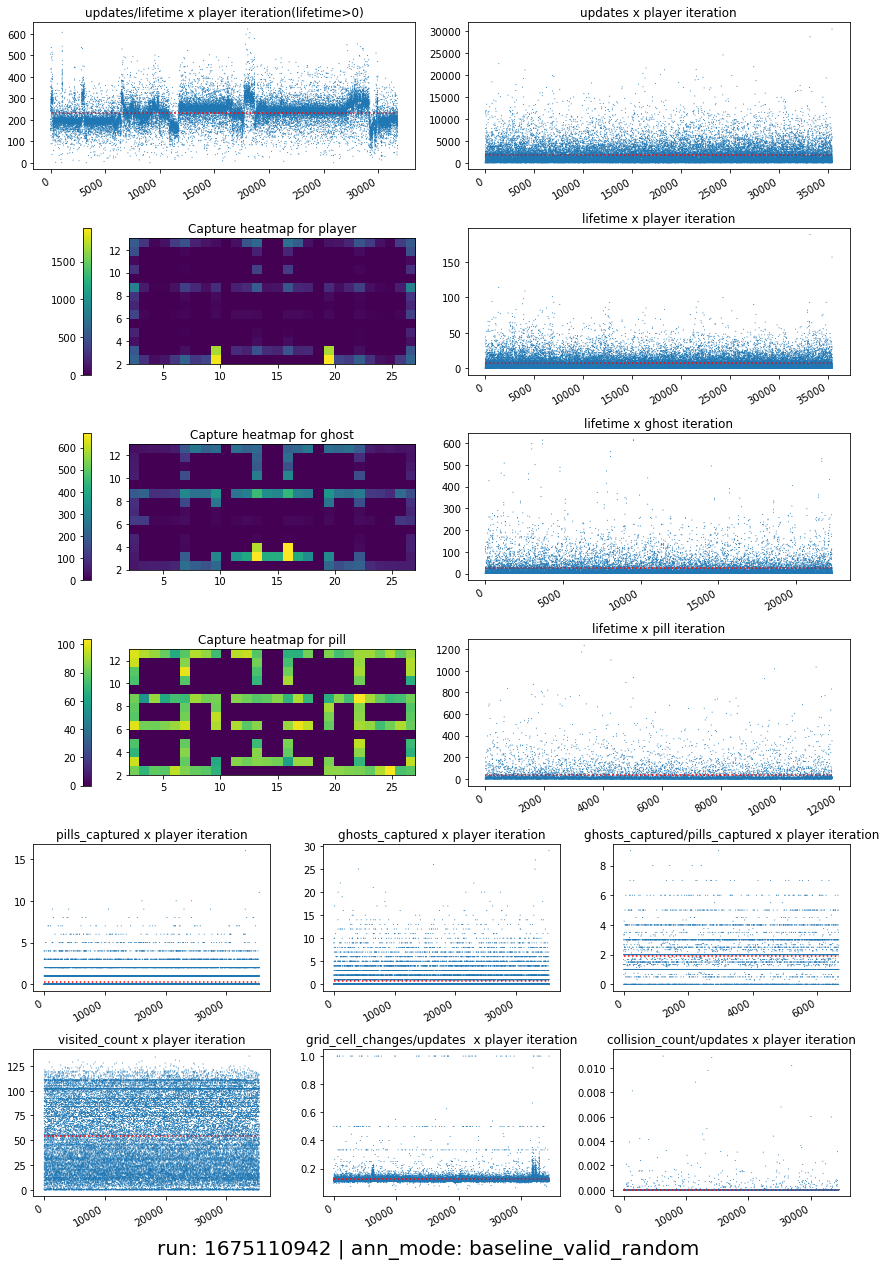

A taxa de atualizacao e as outras metricas
updates/lifetime lifetime r: -0.026033929007390558 rs: 0.02901008881143561 T: 0.019553365218505994
updates/lifetime updates r: 0.08563721360385604 rs: 0.21280476956721053 T: 0.1561342452522412
updates/lifetime visited_count r: 0.1615523156948909 rs: 0.19595573142410191 T: 0.13217936320165807
updates/lifetime grid_cell_changes r: 0.07600108092273958 rs: 0.19896210035091236 T: 0.13705772559293258
updates/lifetime collision_count r: 0.004011150397840334 rs: 0.005980221855200991 T: 0.004884082632930516
updates/lifetime ghosts_captured r: 0.021497318974032446 rs: 0.04982860209673508 T: 0.0389888813999339
updates/lifetime pills_captured r: 0.024051261541097487 rs: 0.05356918398806865 T: 0.042347287614559595
updates e as outras metricas
updates lifetime r: 0.9771279088079184 rs: 0.9831394365450031 T: 0.9088665870835855
updates visited_count r: 0.7325382070649205 rs: 0.9346682948252679 T: 0.7874498712630874
updates grid_cell_changes r: 0.9977768897980

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

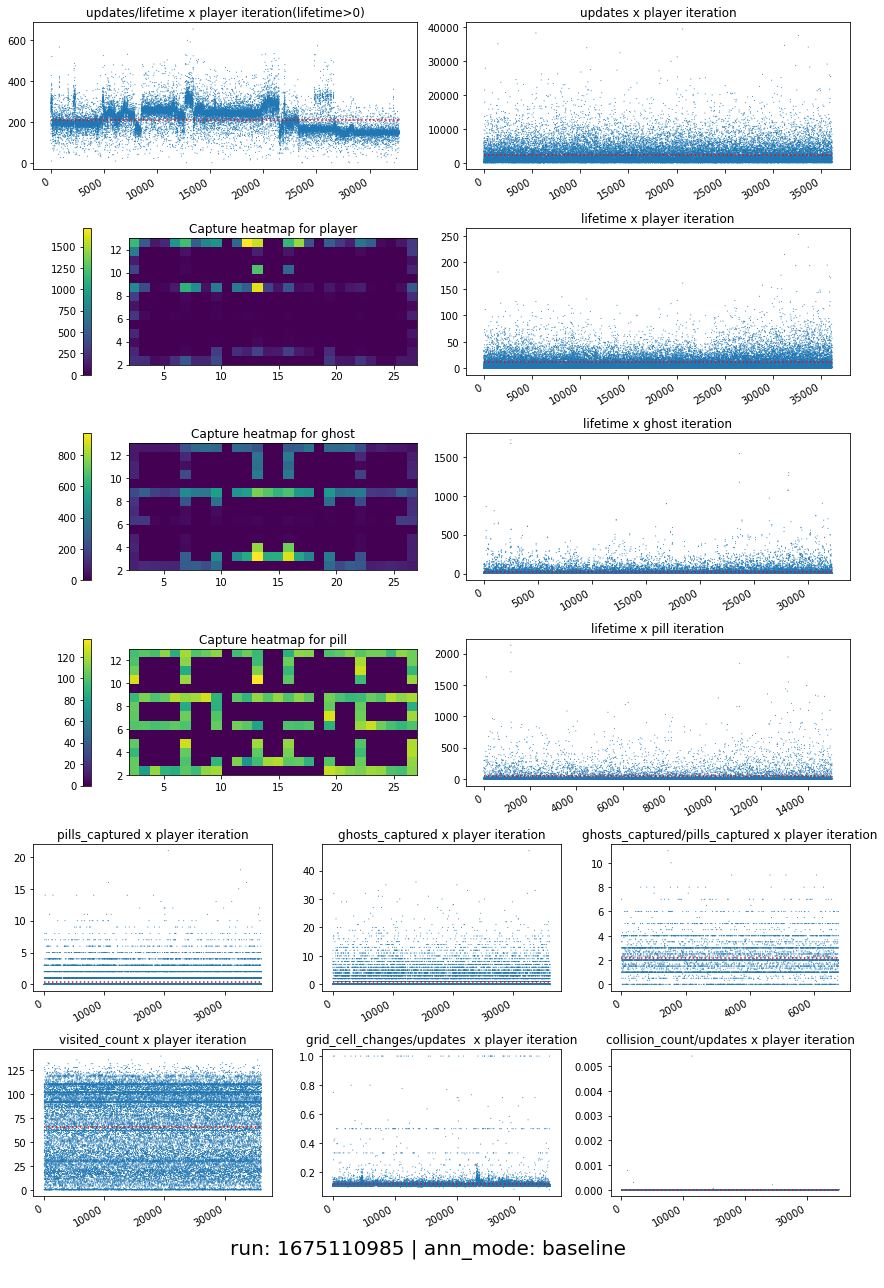

A taxa de atualizacao e as outras metricas
updates/lifetime lifetime r: -0.1058502141424098 rs: -0.047789363729892835 T: -0.03573433077758098
updates/lifetime updates r: 0.056809821415146115 rs: 0.1550853745053004 T: 0.11134508976089752
updates/lifetime visited_count r: 0.1456216206134826 rs: 0.14970588681444486 T: 0.10255401418342439
updates/lifetime grid_cell_changes r: 0.053739540906473184 rs: 0.15099760520269823 T: 0.10409039995613034
updates/lifetime collision_count r: -0.0019956107092770673 rs: -0.0012232845311450644 T: -0.0009990258554623903
updates/lifetime ghosts_captured r: 0.024452476149738268 rs: 0.05519639873989446 T: 0.04310276476870281
updates/lifetime pills_captured r: 0.02645657982775452 rs: 0.05769122139644013 T: 0.04542408493019172
updates e as outras metricas
updates lifetime r: 0.957630279410772 rs: 0.9810211386486903 T: 0.8917970100302856
updates visited_count r: 0.6775534736739649 rs: 0.9316648159585292 T: 0.7961582558651638
updates grid_cell_changes r: 0.9985050

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

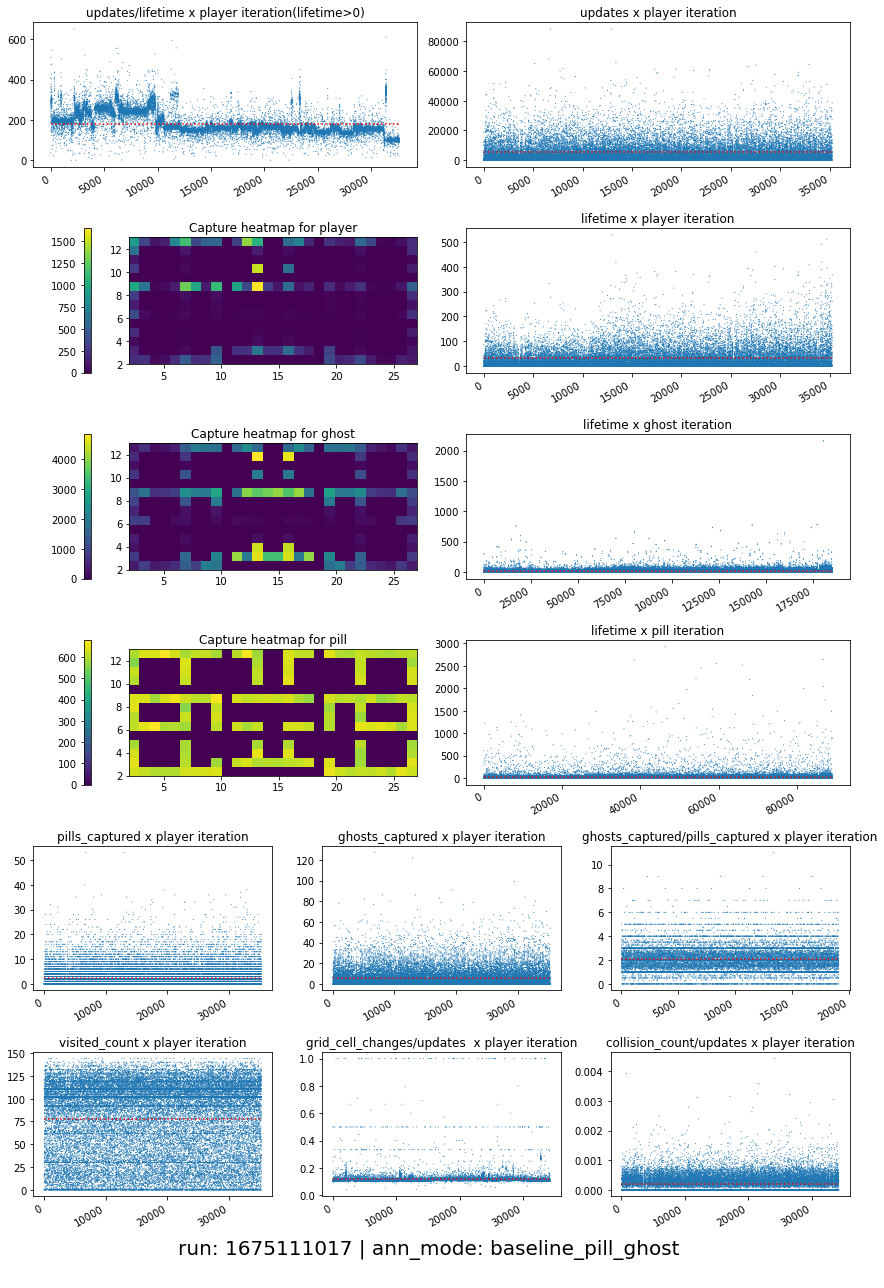

A taxa de atualizacao e as outras metricas
updates/lifetime lifetime r: -0.1433009031413727 rs: -0.0830502996742866 T: -0.060488837585543194
updates/lifetime updates r: 0.020546165915046075 rs: 0.08690282196384501 T: 0.06002301425157628
updates/lifetime visited_count r: 0.09494447965386853 rs: 0.08918822270422601 T: 0.06003239833386408
updates/lifetime grid_cell_changes r: 0.01650524681203703 rs: 0.08318392162659097 T: 0.0557932339443249
updates/lifetime collision_count r: 0.003381775936755979 rs: 0.02501964944006217 T: 0.018552969382398157
updates/lifetime ghosts_captured r: 0.009877499417724062 rs: 0.034595538504306814 T: 0.02474730284667692
updates/lifetime pills_captured r: 0.006883778687579303 rs: 0.03446583590037573 T: 0.024768555870622908
updates e as outras metricas
updates lifetime r: 0.9559051991793418 rs: 0.9846564005310341 T: 0.9019507411127697
updates visited_count r: 0.6670288768024798 rs: 0.9349614955289425 T: 0.7950888671510724
updates grid_cell_changes r: 0.99860653102

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

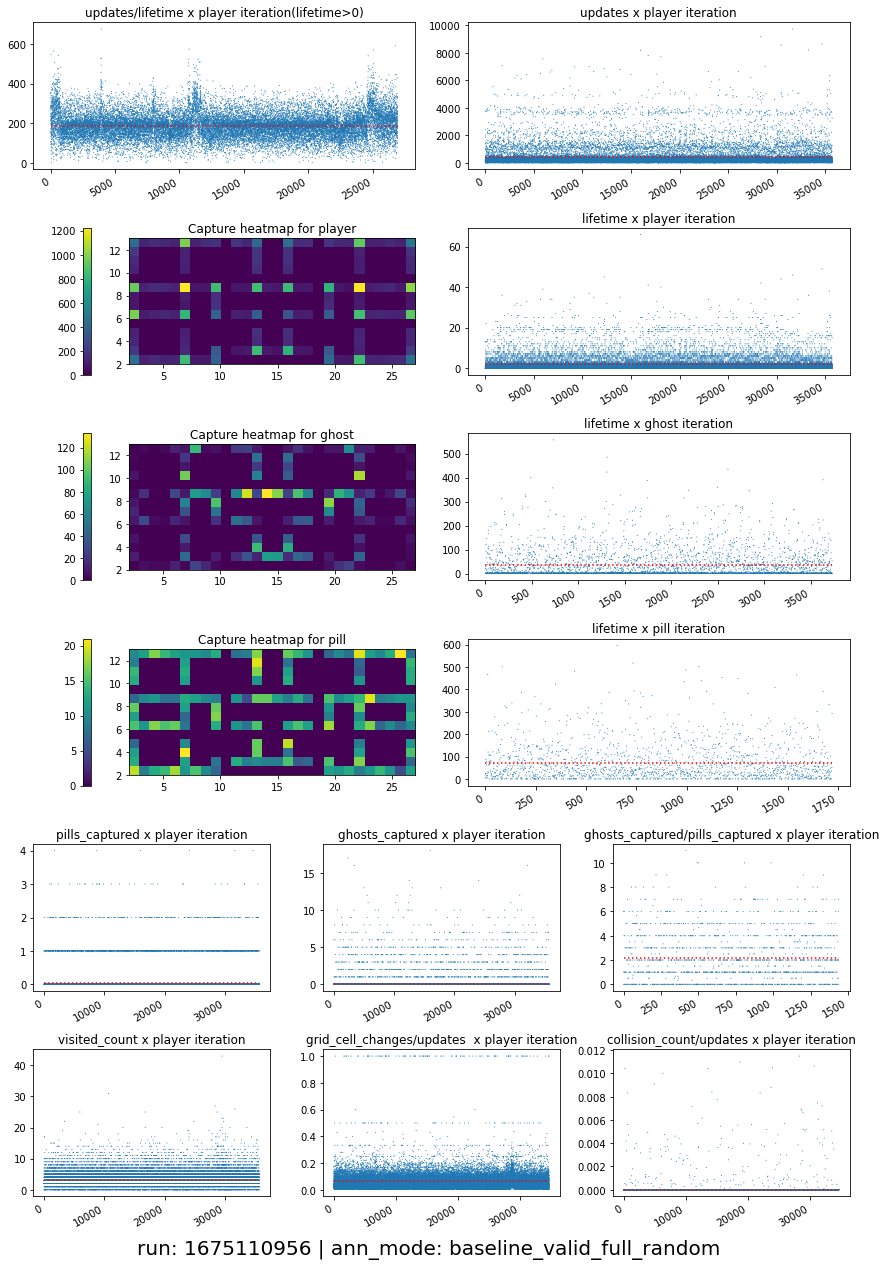

A taxa de atualizacao e as outras metricas
updates/lifetime lifetime r: 0.04701185962313283 rs: 0.026663389225462696 T: 0.031009390729118024
updates/lifetime updates r: 0.1777150169982675 rs: 0.5579836921499078 T: 0.4744030673610155
updates/lifetime visited_count r: 0.20635952290362075 rs: 0.3017726388496921 T: 0.22062909998875124
updates/lifetime grid_cell_changes r: 0.16315066771578352 rs: 0.3156858356484604 T: 0.2150010205209797
updates/lifetime collision_count r: 0.015520392534065952 rs: 0.021412429850462537 T: 0.017495514349650375
updates/lifetime ghosts_captured r: 0.041065997244628914 rs: 0.07681900726946563 T: 0.06218650771541818
updates/lifetime pills_captured r: 0.05699903851476606 rs: 0.08734794560585944 T: 0.07113490458499794
updates e as outras metricas
updates lifetime r: 0.9808790460608733 rs: 0.8651112734657262 T: 0.7540084296709942
updates visited_count r: 0.738395702245647 rs: 0.7297490682527965 T: 0.5922518132310421
updates grid_cell_changes r: 0.8355656233914224 rs:

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

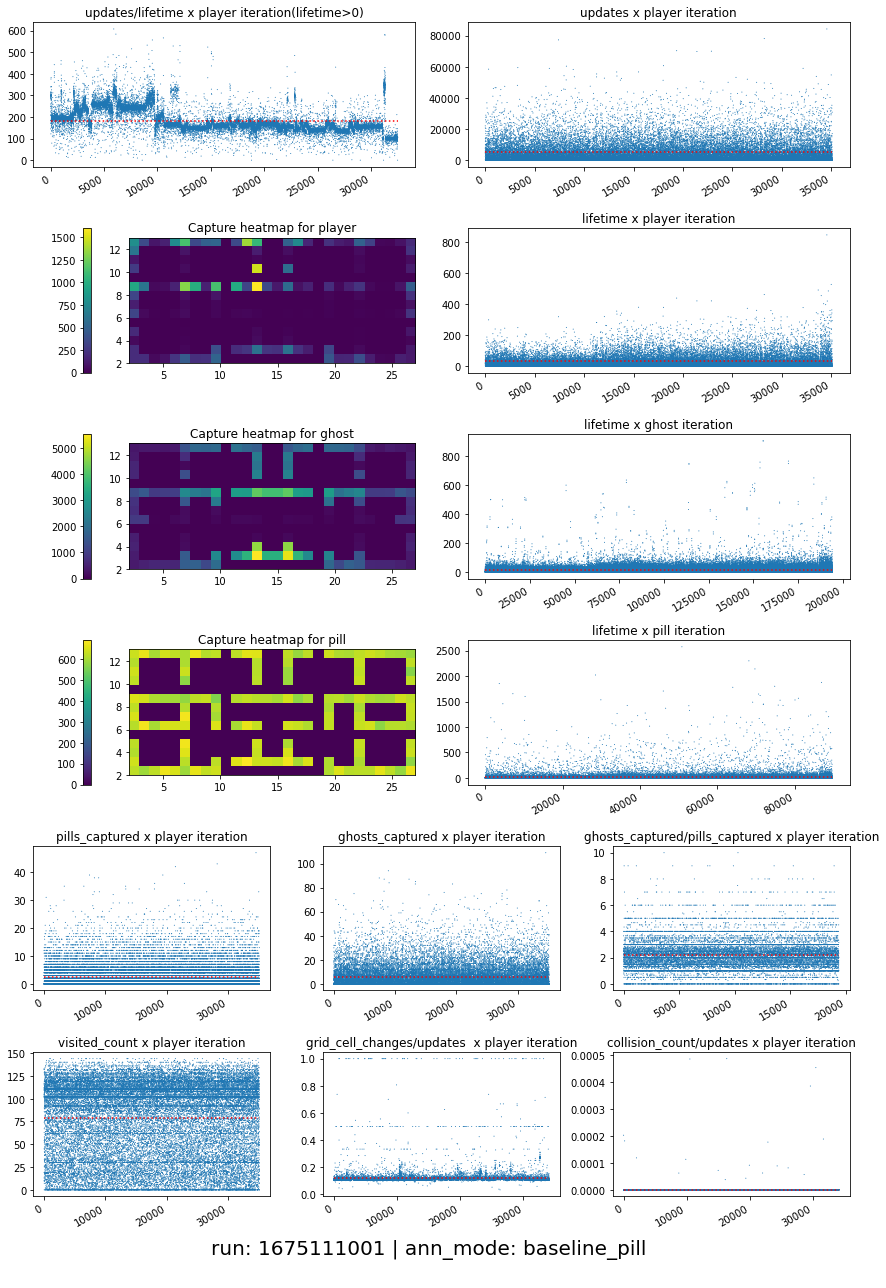

A taxa de atualizacao e as outras metricas
updates/lifetime lifetime r: -0.13564011224214062 rs: -0.06696614170108994 T: -0.04860987605090376
updates/lifetime updates r: 0.031912408210700724 rs: 0.10502578367964012 T: 0.0729066566845152
updates/lifetime visited_count r: 0.10208596302300185 rs: 0.09743319740740454 T: 0.06596272892089594
updates/lifetime grid_cell_changes r: 0.027116106683370562 rs: 0.09946930890408481 T: 0.06751743059085571
updates/lifetime collision_count r: -0.003979455089291125 rs: -0.004928388435331922 T: -0.004024470598256492
updates/lifetime ghosts_captured r: 0.020745280264549467 rs: 0.06562784543647214 T: 0.04672869085172322
updates/lifetime pills_captured r: 0.021677122957786715 rs: 0.06666194438266888 T: 0.04789333645675121
updates e as outras metricas
updates lifetime r: 0.9540714305364667 rs: 0.9843289281641044 T: 0.9007803272603219
updates visited_count r: 0.670368349882746 rs: 0.9359293417125175 T: 0.7966846401600344
updates grid_cell_changes r: 0.99862840

In [5]:
errors = list()
paths_dict = dict()
for path in selected_paths:
	paths_dict[path], load_errors = analyse_all_in_path(path)
	errors.extend(load_errors)
	if TEST == True:
		break

# run count
run_count = 0
for index, path_dict in paths_dict.items():
	for _, run_dict in path_dict.items():
		run_count = run_count + 1
		errors.extend(tools.generate_run_report_from_dict(run_dict))

print("Path count: ", len(paths_dict.keys()))
print("Run count: ", run_count)
print("Errors:\n" + str(errors))